### Data Exploration

In this notebook I do some exploratory analysis. I plotted the charts that I think represent the dataset best regarding my prediction objective.

At the end I did some feature importance as well as some f-score and variance tests without the place_name, since this is one of the things that most affect prices, and I wanted to see how the other features influence the prediction.

<a id = "menu"></a>

- [Charts](#charts)
- [Tests](#test)
- [Feature Importance](#feature)

In [5]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import  matplotlib.pyplot as plt
import seaborn as sns
import re
import math
import warnings
warnings.filterwarnings('ignore')

In [6]:
data = pd.read_csv ("Data_Clean.csv").drop(columns = "Unnamed: 0")

<AxesSubplot:>

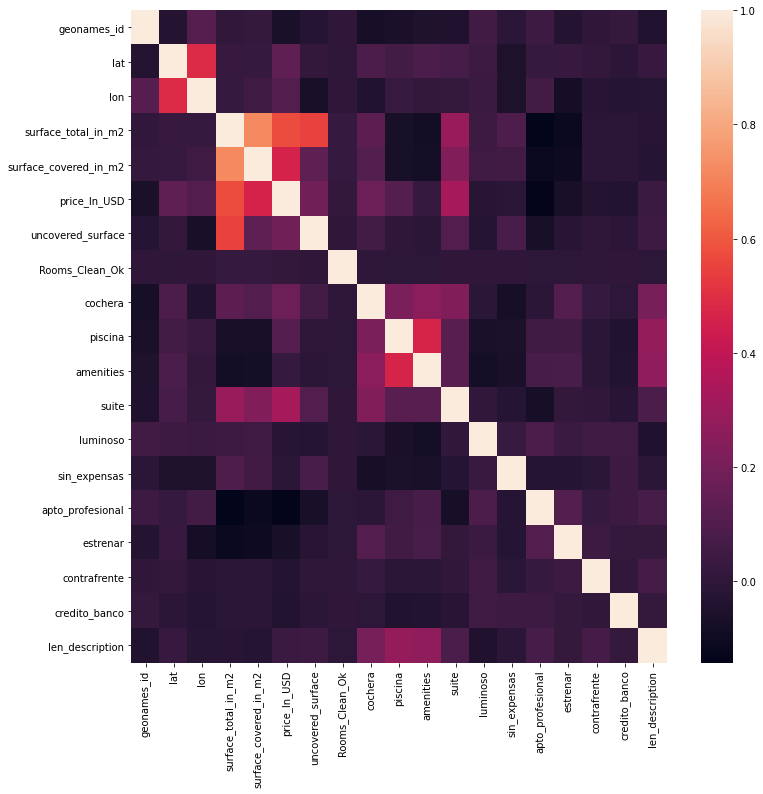

In [7]:
dims = (12, 12)
fig, ax = plt.subplots(figsize=dims)
sns.heatmap(data.corr())

<a id = "charts"></a>

#### Charts

In the folowing section there are some charts with some brief insight. 

[Return to Menu](#menu)

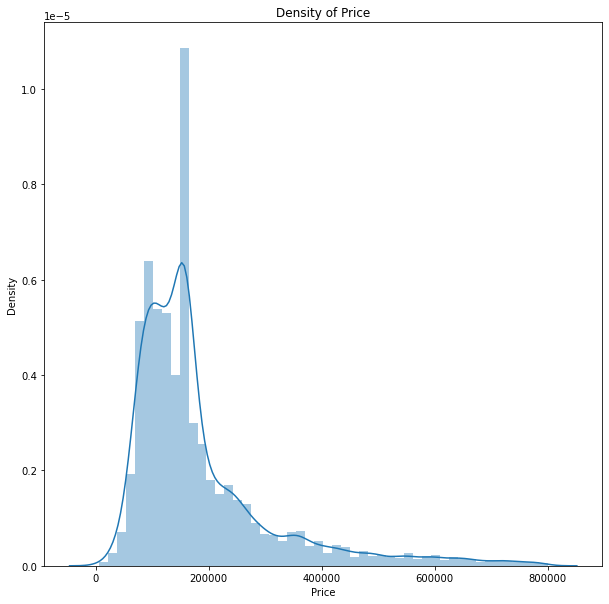

In [8]:
dims = (10, 10)
fig, ax = plt.subplots(figsize=dims)
sns.distplot(data.price_In_USD,hist = True,kde = True,bins = None).set_title("Density of Price")
ax.set(xlabel="Price");

We can see the distribution of my target variable here. There is a pretty notorious outlier. I'll use trees as a model so it doesn't affect the training that much.\
Also the distribution is somewhat gaussean.

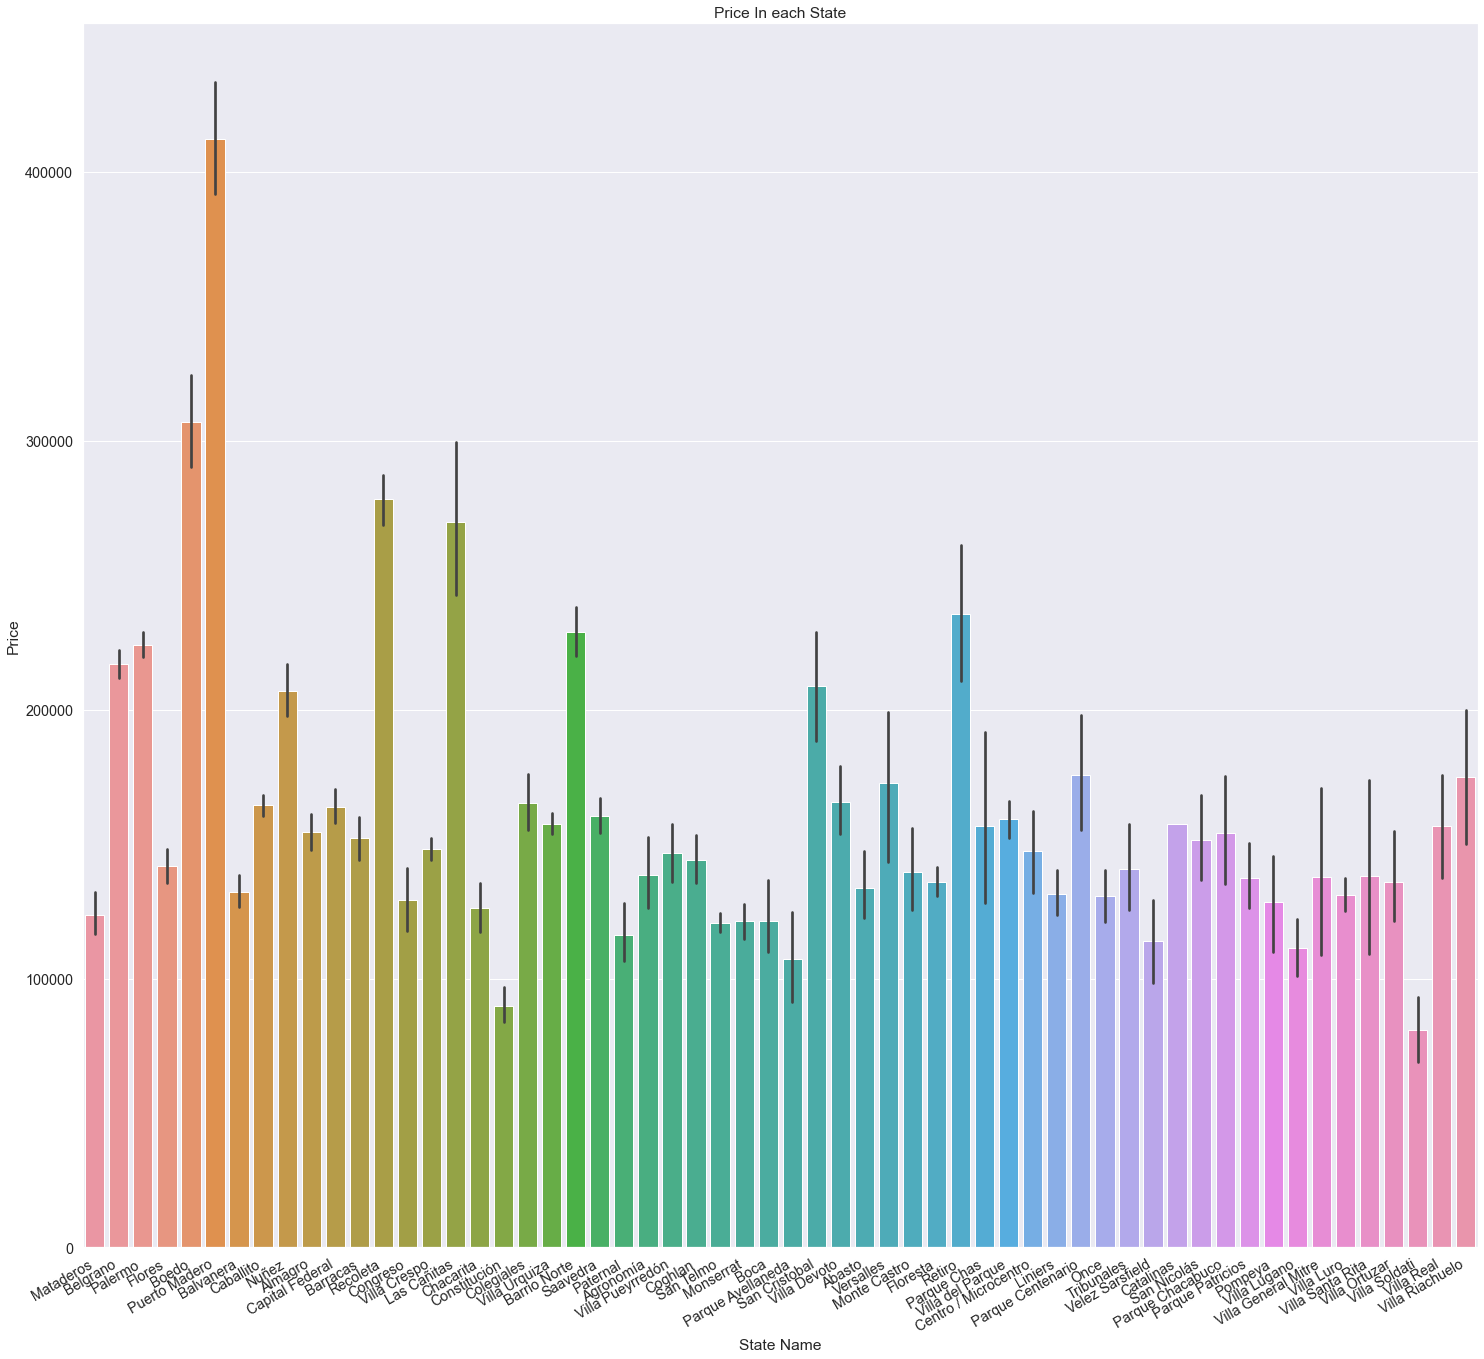

In [9]:
sns.set(font_scale=1.3)
dims = (25, 25)
fig, ax = plt.subplots(figsize=dims)
sns.barplot(y ='price_In_USD',data = data, x = 'Place_Name_Ok').set_title("Price In each State")
ax.set(xlabel="State Name", ylabel = "Price")
fig.autofmt_xdate();

This is a simple chart to show the prices in each place_name (the neighbourhood if you wish).\
Puerto madero is the most expensive one, so thats a place im not gonna move in.

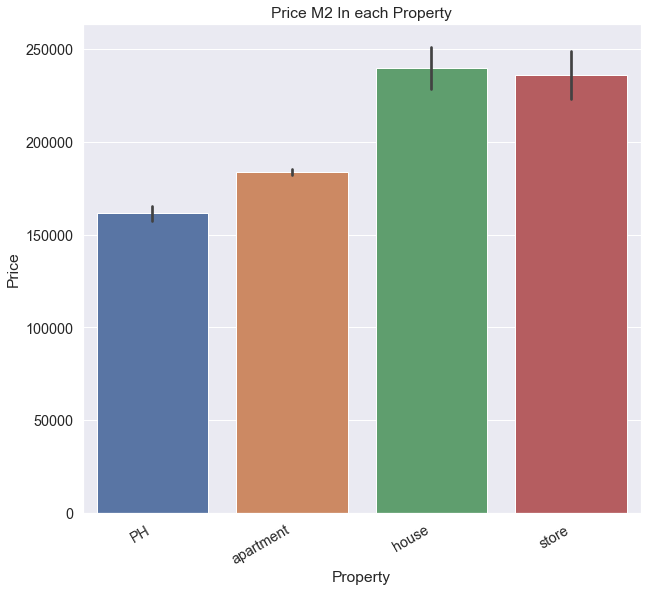

In [6]:
dims = (10, 10)
fig, ax = plt.subplots(figsize=dims)
sns.barplot(y ='price_In_USD',data = data, x = 'property_type').set_title("Price M2 In each Property")
ax.set(xlabel="Property", ylabel = "Price")
fig.autofmt_xdate();

I find this intresting, this chart shows the price based on the type of property. Aparently stores are quite more expensive than apartments and PH.\
Houses are more expensive than apartments, but Capital Federal is a metropolis, so there aren't many houses here. This houses are pricier but are less in raw ammount than apartment. Apartments are the most frecuent in this city so the mean price is heavily affected.

[Text(0.5, 0, 'Garage'), Text(0, 0.5, 'Price')]

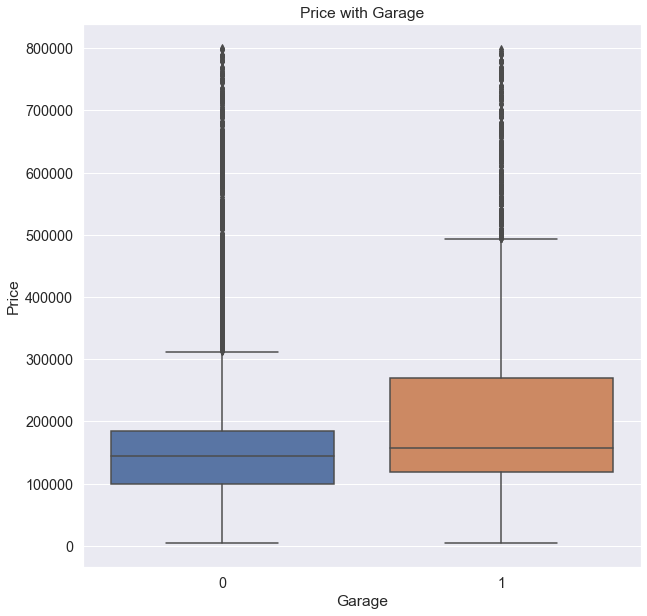

In [7]:
fig, ax = plt.subplots(figsize=dims)
sns.boxplot(ax=ax, data = data, y = "price_In_USD",x = "cochera").set_title("Price with Garage")
ax.set(xlabel="Garage", ylabel = "Price");

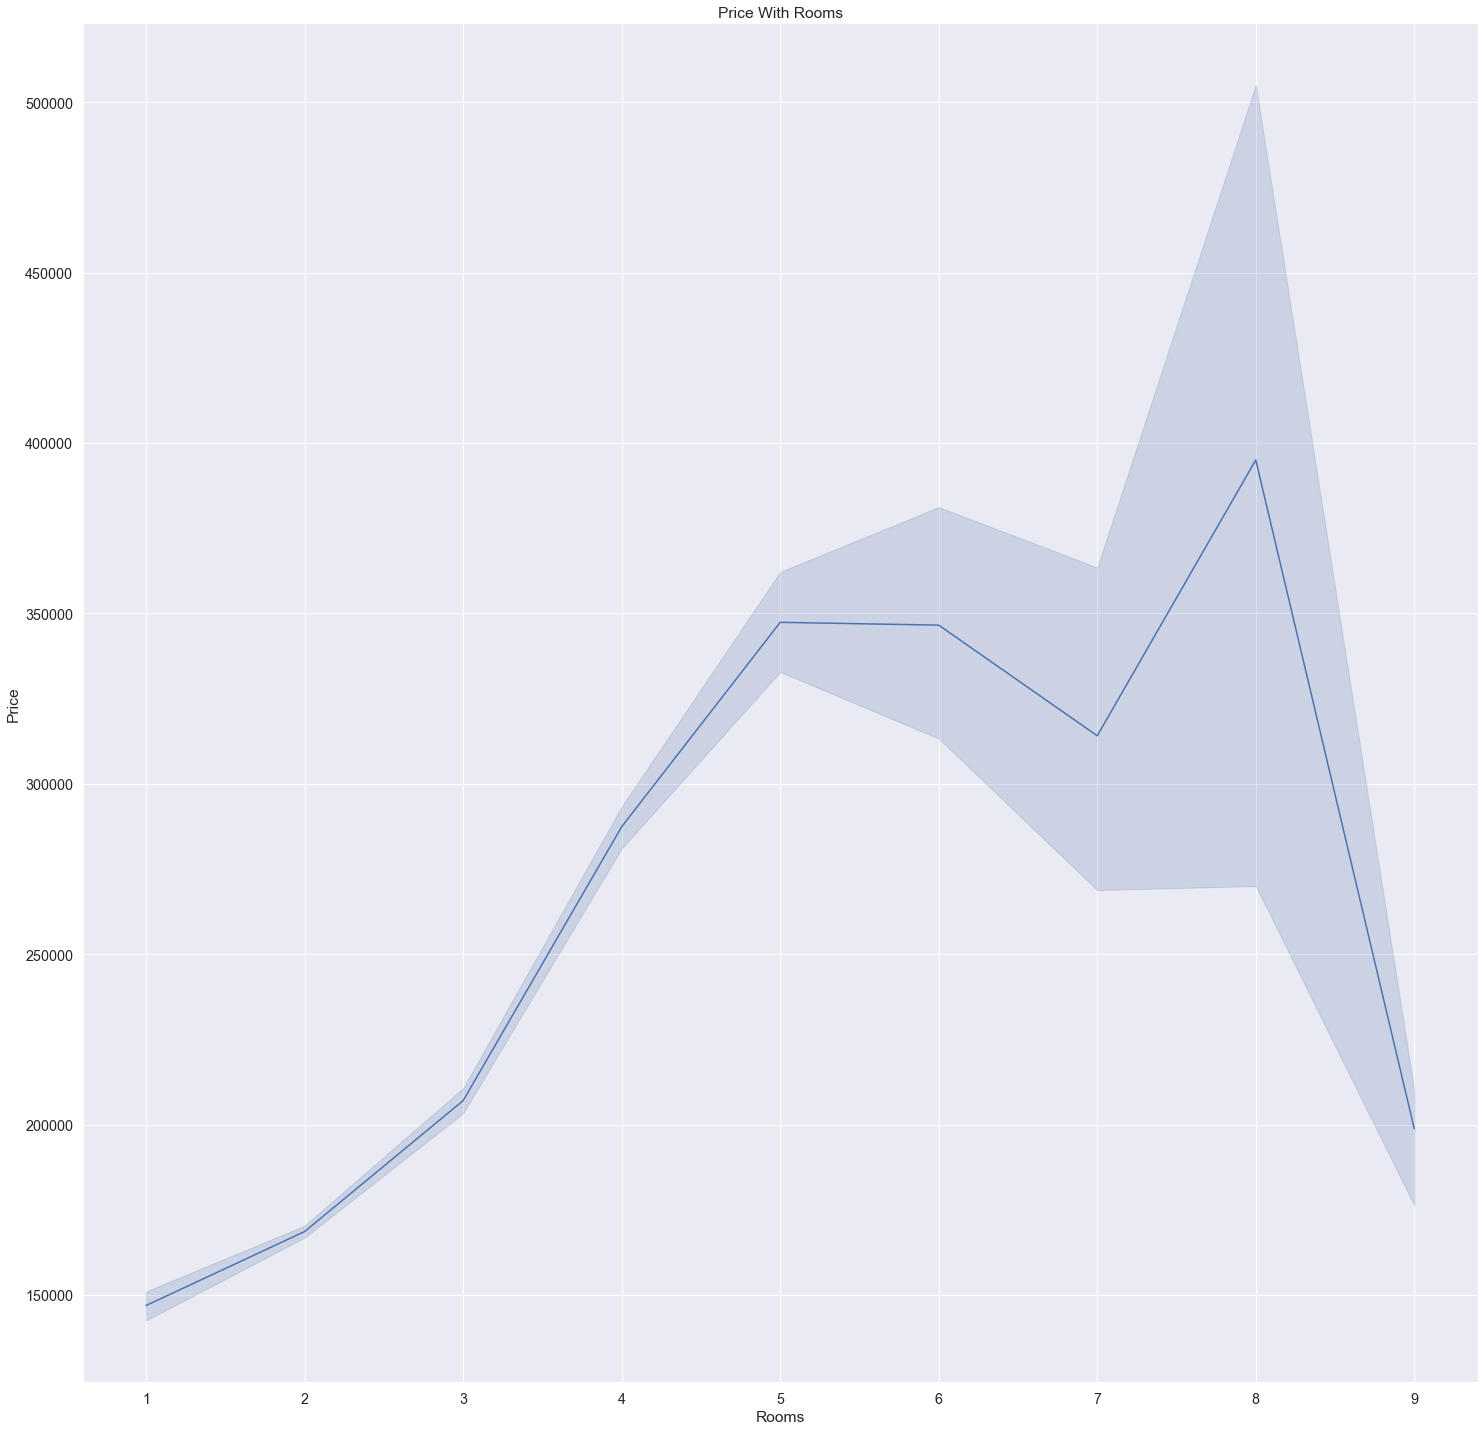

In [10]:
fig, ax = plt.subplots(figsize=dims)
sns.lineplot(x = 'Rooms_Clean_Ok', y = "price_In_USD", data = data[data.Rooms_Clean_Ok < 4000]).set_title("Price With Rooms") 
ax.set(xlabel="Rooms", ylabel = "Price");

In [114]:
data_texto = data["description"]

In [119]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [126]:
text = (" ".join(review for review in data_texto)).lower()

In [169]:
stopwords = set(STOPWORDS)
stopwords.update(["1", "2", "3", "4", "5","6", "7", "8", "9", "10","ubicado", "cuadras","edificio","en","la","de","el","ambiente","ambientes","cuenta","con","medidas",
                  "las","los","piso","departamento","planta","primer","similar","o","pisos","Propietario","todo","parte","por","salida","metro","cuadrado","aproximadas"
                 ,"son","este","inmueble","previo","se","encuentra","publicado","hora" ,"todos","aviso","acero","inoxidable","metros","m2","u  s","cual","lo","unidade"
                 ,"mesada","y","un","mt","entrada","baja","dos","barrio","ciudad","mts"])

In [170]:
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

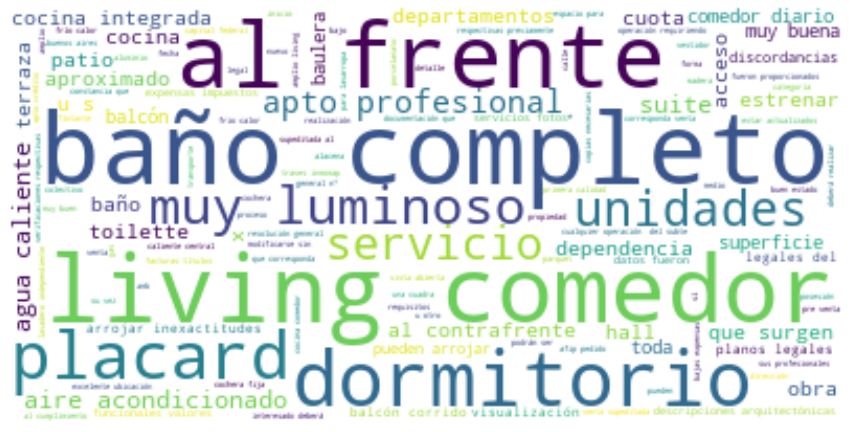

In [171]:
dims = (15, 15)
fig, ax = plt.subplots(figsize=dims)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

This chart represents the most frecuent words in descriptions of properties. There are quite intresting things here. For example, Al frente("front") means the apartment faces the street. We can deduct most apartments face the street and not the other way. Lighting is something that appears quite often, maybe because it makes an impact in buyers.
Things like air conditioning, hot water or suitable professional are also somewhat frecuent. We can see how descriptions are written in this city and also what people want to see more when buying houses in Capital Federal

<div class="alert alert-block alert-success">
<b>Overall Thoughts:</b> 
    
    My city is fucking expensive
    
</div>   

<a id = "test"></a>

#### Anova Tests

In the next section i did some test without the place_name to see how much does the features explain the variance in the dataset.

[Return to Menu](#menu)

In [44]:
Variance_Series = pd.get_dummies(data.drop(columns = ['title','description','Place_Name_Ok'])).apply(np.var).apply(lambda x: '%.2f' % x)

In [45]:
Variance_Series.sort_values(axis=0, ascending=False)

Rooms_Clean_Ok                      693.58
len_description                  358700.36
geonames_id                284196323260.31
uncovered_surface                   215.94
surface_covered_in_m2              1666.34
price_In_USD                16515903398.30
surface_total_in_m2                1458.89
cochera                               0.22
luminoso                              0.18
amenities                             0.16
piscina                               0.15
suite                                 0.12
apto_profesional                      0.11
estrenar                              0.09
property_type_apartment               0.08
contrafrente                          0.05
property_type_PH                      0.04
property_type_store                   0.03
sin_expensas                          0.02
credito_banco                         0.02
property_type_house                   0.02
lat                                   0.00
lon                                   0.00
dtype: obje

In [55]:
#f-score and p-value tests
from sklearn.feature_selection import SelectKBest , f_regression

def test (data, target, k=2):
    feat_selector = SelectKBest(f_regression,k=k)
    _ = feat_selector.fit(data.drop(target,axis = 1),data[target])
    feat_scores = pd.DataFrame()
    feat_scores["F Score"] = feat_selector.scores_
    feat_scores["P Value"] = feat_selector.pvalues_
    feat_scores["Feature"] = data.drop(target,axis=1).columns
    return feat_scores

Feat = test(pd.get_dummies(data.drop(columns = ['title','description','Place_Name_Ok',"geonames_id","lon","lat"])),'price_In_USD')
Feat = Feat.sort_values(["F Score","P Value"],ascending = [False,False])
Feat

,F Score,P Value,Feature
0,11251.597390,0.000000e+00,surface_total_in_m2
1,6277.136563,0.000000e+00,surface_covered_in_m2
7,2753.312712,0.000000e+00,suite
2,809.429322,5.042104e-175,uncovered_surface
4,688.650713,1.375777e-149,cochera
10,424.685447,1.622220e-93,apto_profesional
5,279.235757,2.563140e-62,piscina
11,113.925505,1.560401e-26,estrenar
18,105.187879,1.254766e-24,property_type_store
17,69.847545,6.764252e-17,property_type_house


<a id = "feature"></a>

#### Feature Importance

Finally i did some feature importance. I trained a random forest and Extratrees (without place_name) to see wich features would influence more in a regression prediction.

[Return to Menu](#menu)

In [66]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

rf = RandomForestRegressor (n_jobs = -1 )
et = ExtraTreesRegressor ( n_jobs = -1  )

X = pd.get_dummies(data.drop(columns = ['title','description',"price_In_USD","geonames_id","lon","lat",'Place_Name_Ok']))
y = data.price_In_USD

rf.fit(pd.get_dummies(X),y)
et.fit(pd.get_dummies(X),y)

ExtraTreesRegressor(n_jobs=-1)

<AxesSubplot:>

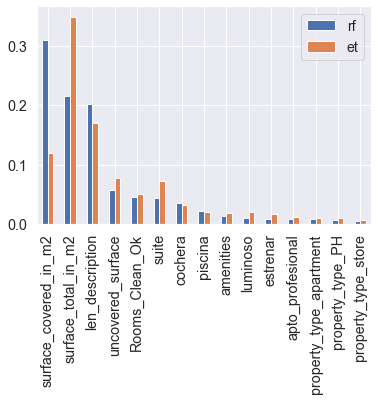

In [67]:
imp = pd.DataFrame({"rf" : rf.feature_importances_ , "et" : et.feature_importances_}).sort_values(['rf'],ascending = False)
names = X.columns[imp.index]
imp.index = names
imp.head(15).plot(kind = "bar")